<a href="https://colab.research.google.com/github/cshooon/Data_Analysis/blob/main/MovingBeyondLinearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikit-learn==1.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

pd.set_option('display.precision', 4)
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.5f}'.format)

plt.style.use('seaborn')

<ipython-input-32-ed05f79d7c99>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
wage = pd.read_csv('/content/drive/MyDrive/RecoSys/Data/Wage.csv', index_col=0)
wage.iloc[:, 2:10] = wage.iloc[:, 2:10].apply(pd.Categorical)

<ipython-input-33-72c9647e64ac>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  wage.iloc[:, 2:10] = wage.iloc[:, 2:10].apply(pd.Categorical)


In [ ]:
wage

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.31806,75.04315
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.25527,70.47602
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.87506,130.98218
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.04139,154.68529
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.31806,75.04315
...,...,...,...,...,...,...,...,...,...,...,...,...
376816,2008,44,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.04139,154.68529
302281,2007,30,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.60206,99.68946
10033,2005,27,1. Male,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.19312,66.22941
14375,2005,27,1. Male,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.47712,87.98103


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pol = PolynomialFeatures(degree=5, interaction_only=False, include_bias=False)
polf = pol.fit_transform(wage.loc[:,'age'].values.reshape(-1,1))

wage['age_2']=polf[:,1]
wage['age_3']=polf[:,2]
wage['age_4']=polf[:,3]
wage['age_5']=polf[:,4]

In [ ]:
wage

,year,age,sex,maritl,race,education,...,logwage,wage,age_2,age_3,age_4,age_5
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,...,4.31806,75.04315,324.00000,"5,832.00000","104,976.00000","1,889,568.00000"
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,...,4.25527,70.47602,576.00000,"13,824.00000","331,776.00000","7,962,624.00000"
161300,2003,45,1. Male,2. Married,1. White,3. Some College,...,4.87506,130.98218,"2,025.00000","91,125.00000","4,100,625.00000","184,528,125.00000"
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,...,5.04139,154.68529,"1,849.00000","79,507.00000","3,418,801.00000","147,008,443.00000"
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,...,4.31806,75.04315,"2,500.00000","125,000.00000","6,250,000.00000","312,500,000.00000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376816,2008,44,1. Male,2. Married,1. White,3. Some College,...,5.04139,154.68529,"1,936.00000","85,184.00000","3,748,096.00000","164,916,224.00000"
302281,2007,30,1. Male,2. Married,1. White,2. HS Grad,...,4.60206,99.68946,900.00000,"27,000.00000","810,000.00000","24,300,000.00000"
10033,2005,27,1. Male,2. Married,2. Black,1. < HS Grad,...,4.19312,66.22941,729.00000,"19,683.00000","531,441.00000","14,348,907.00000"
14375,2005,27,1. Male,1. Never Married,1. White,3. Some College,...,4.47712,87.98103,729.00000,"19,683.00000","531,441.00000","14,348,907.00000"


In [ ]:
wage['wage_250'] = (wage.wage>250).map({True:1, False:0})

X=wage.loc[:,['age','age_2','age_3','age_4']]
y=wage.wage

In [ ]:
wage

,year,age,sex,maritl,race,education,...,wage,age_2,age_3,age_4,age_5,wage_250
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,...,75.04315,324.00000,"5,832.00000","104,976.00000","1,889,568.00000",0
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,...,70.47602,576.00000,"13,824.00000","331,776.00000","7,962,624.00000",0
161300,2003,45,1. Male,2. Married,1. White,3. Some College,...,130.98218,"2,025.00000","91,125.00000","4,100,625.00000","184,528,125.00000",0
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,...,154.68529,"1,849.00000","79,507.00000","3,418,801.00000","147,008,443.00000",0
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,...,75.04315,"2,500.00000","125,000.00000","6,250,000.00000","312,500,000.00000",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376816,2008,44,1. Male,2. Married,1. White,3. Some College,...,154.68529,"1,936.00000","85,184.00000","3,748,096.00000","164,916,224.00000",0
302281,2007,30,1. Male,2. Married,1. White,2. HS Grad,...,99.68946,900.00000,"27,000.00000","810,000.00000","24,300,000.00000",0
10033,2005,27,1. Male,2. Married,2. Black,1. < HS Grad,...,66.22941,729.00000,"19,683.00000","531,441.00000","14,348,907.00000",0
14375,2005,27,1. Male,1. Never Married,1. White,3. Some College,...,87.98103,729.00000,"19,683.00000","531,441.00000","14,348,907.00000",0


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(-184.1541797734385,
 array([ 2.12455205e+01, -5.63859313e-01,  6.81068771e-03, -3.20383037e-05]))

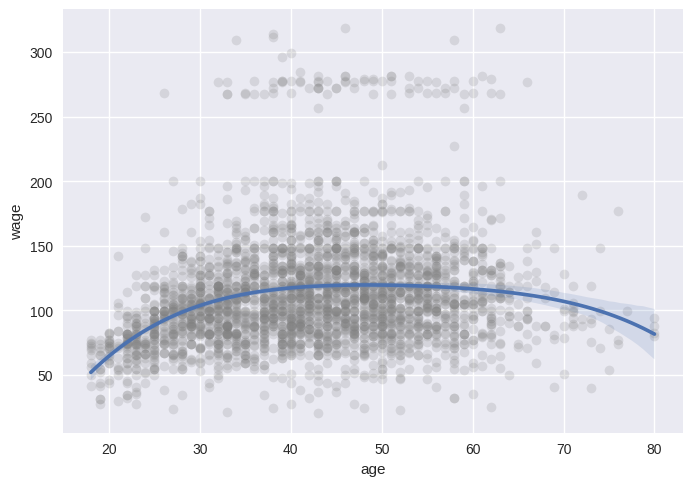

In [ ]:
sns.regplot(x='age',y='wage', data=wage, order=4, scatter_kws={'alpha':0.2,'color':'gray'});

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(fit_intercept=True, C=1e9)
log_reg.fit(X, wage.wage_250)

log_reg.intercept_, log_reg.coef_

(array([-5.6498837e-05]),
 array([[-1.12834472e-03, -1.60767959e-02,  5.10936213e-04,
         -4.28423026e-06]]))

In [ ]:
from statsmodels.formula.api import glm

lr_sm = glm(formula='wage_250 ~ age + age_2 + age_3 + age_4',
           data=wage, family=sm.families.Binomial()).fit()

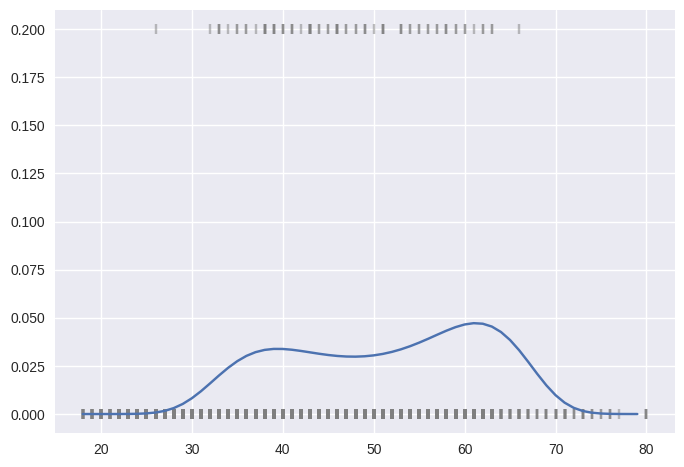

In [ ]:
age_grid = np.arange(wage.age.min(), wage.age.max()).reshape(-1,1)

X_test = pd.DataFrame(PolynomialFeatures(4, include_bias=True).fit_transform(age_grid), columns=['Intercept','age','age_2','age_3','age_4'])

log_reg_pred = lr_sm.predict(X_test)

plt.scatter(wage.age, wage.wage_250/5, marker='|', color='gray', alpha=0.5)
plt.plot(age_grid, log_reg_pred);

In [ ]:
age_step, bins = pd.cut(wage.age, 4, retbins=True, right=True)
bins

array([17.938, 33.5  , 49.   , 64.5  , 80.   ])

In [ ]:
wage_step = pd.concat([wage.age, age_step, wage.wage, wage.wage_250],
                     keys=['age','age_step','wage','wage_250'],
                     axis=1)
wage_step

,age,age_step,wage,wage_250
231655,18,"(17.938, 33.5]",75.04315,0
86582,24,"(17.938, 33.5]",70.47602,0
161300,45,"(33.5, 49.0]",130.98218,0
155159,43,"(33.5, 49.0]",154.68529,0
11443,50,"(49.0, 64.5]",75.04315,0
...,...,...,...,...
376816,44,"(33.5, 49.0]",154.68529,0
302281,30,"(17.938, 33.5]",99.68946,0
10033,27,"(17.938, 33.5]",66.22941,0
14375,27,"(17.938, 33.5]",87.98103,0


In [ ]:
X = pd.get_dummies(wage_step.age_step)
X = X.drop(X.columns[0], axis=1)
y = wage_step.wage

lr_step = LinearRegression(fit_intercept = True)

lr_step.fit(X,y)
lr_step.intercept_, lr_step.coef_

(94.15839203351902, array([24.05349138, 23.664559  ,  7.6405917 ]))

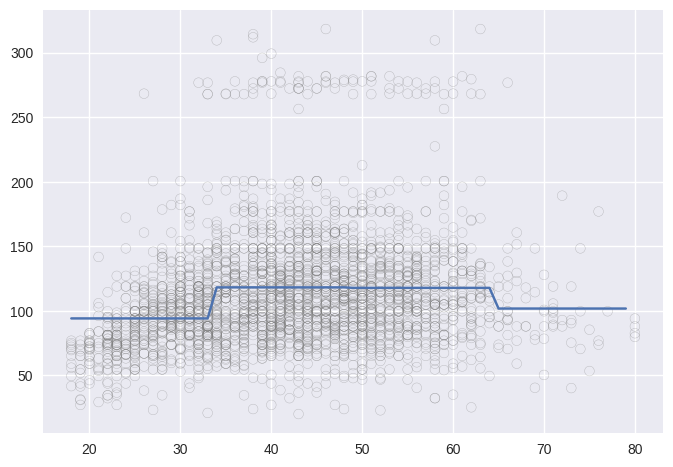

In [ ]:
age_grid_bins = np.digitize(age_grid.ravel(), bins)

X_test = pd.get_dummies(age_grid_bins).drop(1, axis=1)

lin_pred = lr_step.predict(X_test)

plt.scatter(wage_step.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolor='None')
plt.plot(age_grid, lin_pred);

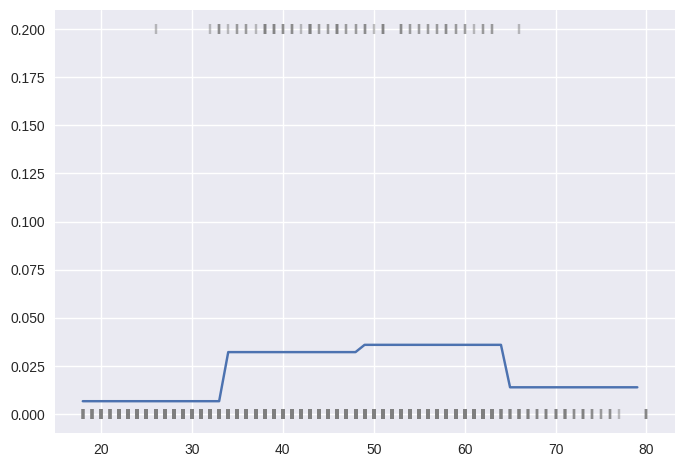

In [ ]:
from statsmodels.api import GLM

lr_sm = GLM(wage_step.wage_250, sm.add_constant(X),
           family=sm.families.Binomial()).fit()

log_pred = lr_sm.predict(sm.add_constant(X_test))

plt.scatter(wage_step.age, wage_step.wage_250/5, marker='|', color='gray', alpha=0.5)
plt.plot(age_grid, log_pred);

In [ ]:
from patsy import dmatrix
age_grid = np.arange(wage.age.min(), wage.age.max()).reshape(-1, 1)
age_spline1 = dmatrix('bs(age, knots=(25,40,60), degree=3, include_intercept=False)',
                     data=wage,
                     return_type='dataframe')

age_spline1

,Intercept,"bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]","bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]"
231655,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
86582,1.00000,0.55991,0.40378,0.03340,0.00000,0.00000,0.00000
161300,1.00000,0.00000,0.11480,0.61856,0.26273,0.00391,0.00000
155159,1.00000,0.00000,0.16711,0.63317,0.19888,0.00084,0.00000
11443,1.00000,0.00000,0.03401,0.50819,0.42654,0.03125,0.00000
...,...,...,...,...,...,...,...
376816,1.00000,0.00000,0.13932,0.62847,0.23021,0.00200,0.00000
302281,1.00000,0.13774,0.62911,0.22882,0.00433,0.00000,0.00000
10033,1.00000,0.30262,0.58685,0.11025,0.00028,0.00000,0.00000
14375,1.00000,0.30262,0.58685,0.11025,0.00028,0.00000,0.00000


In [ ]:
age_grid_spline1 = dmatrix('bs(age_grid, knots=(25,40,60), degree=3, include_intercept=False)',
                           {'age_grid': age_grid},
                          return_type = 'dataframe')
age_grid_spline1

,Intercept,"bs(age_grid, knots=(25, 40, 60), degree=3, include_intercept=False)[0]","bs(age_grid, knots=(25, 40, 60), degree=3, include_intercept=False)[1]","bs(age_grid, knots=(25, 40, 60), degree=3, include_intercept=False)[2]","bs(age_grid, knots=(25, 40, 60), degree=3, include_intercept=False)[3]","bs(age_grid, knots=(25, 40, 60), degree=3, include_intercept=False)[4]","bs(age_grid, knots=(25, 40, 60), degree=3, include_intercept=False)[5]"
0,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,1.00000,0.35200,0.01810,0.00015,0.00000,0.00000,0.00000
2,1.00000,0.56743,0.06690,0.00124,0.00000,0.00000,0.00000
3,1.00000,0.67110,0.13813,0.00417,0.00000,0.00000,0.00000
4,1.00000,0.68785,0.22353,0.00989,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...
57,1.00000,0.00000,0.00000,0.00160,0.05642,0.44993,0.49205
58,1.00000,0.00000,0.00000,0.00067,0.03291,0.36924,0.59717
59,1.00000,0.00000,0.00000,0.00020,0.01515,0.26837,0.71629
60,1.00000,0.00000,0.00000,0.00002,0.00392,0.14579,0.85027


In [ ]:
# Rename the columns of the training and prediction data to match each other 오류 나서 추가
column_rename_dict = {f"bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[{i}]": f"spline_basis_{i}" for i in range(age_spline1.shape[1])}
age_spline1.rename(columns=column_rename_dict, inplace=True)

column_rename_dict = {f"bs(age_grid, knots=(25, 40, 60), degree=3, include_intercept=False)[{i}]": f"spline_basis_{i}" for i in range(age_grid_spline1.shape[1])}
age_grid_spline1.rename(columns=column_rename_dict, inplace=True)

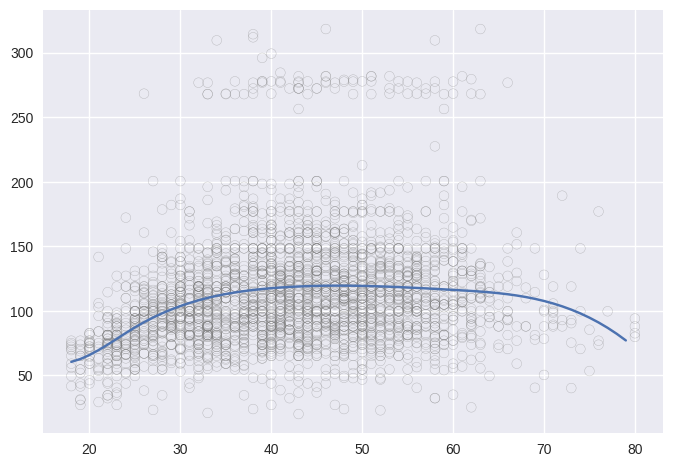

In [ ]:
spline_reg1 = LinearRegression(fit_intercept=False)
spline_reg1.fit(age_spline1, wage.wage)

spline_pred1 = spline_reg1.predict(age_grid_spline1)

plt.scatter(wage.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolor = 'None')
plt.plot(age_grid, spline_pred1);

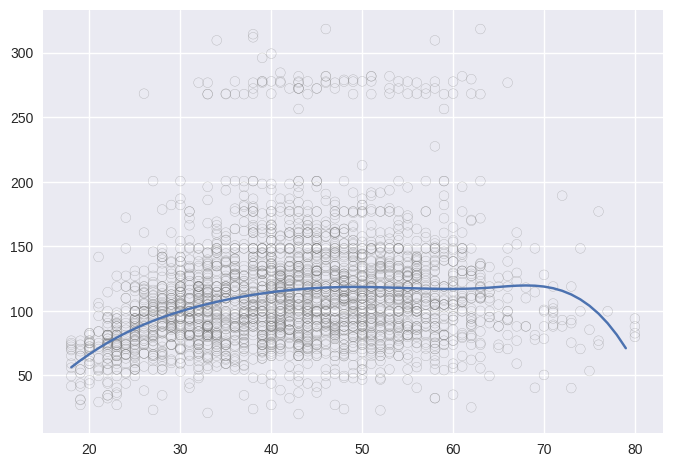

In [ ]:
age_spline2 = dmatrix('bs(age, df=6, include_intercept=False)',
                     data=wage,
                     return_type='dataframe')

age_grid_spline2 = dmatrix('bs(age_grid, df=6, include_intercept=False)',
                          {'age_grid':age_grid},
                          return_type='dataframe')

# 오류 나서 추가(Value Error)
column_rename_dict = {f"bs(age, df=6, include_intercept=False)[{i}]": f"spline_basis_{i}" for i in range(age_spline2.shape[1])}
age_spline2.rename(columns=column_rename_dict, inplace=True)

column_rename_dict = {f"bs(age_grid, df=6, include_intercept=False)[{i}]": f"spline_basis_{i}" for i in range(age_grid_spline2.shape[1])}
age_grid_spline2.rename(columns=column_rename_dict, inplace=True)

spline_reg2 = LinearRegression(fit_intercept=False)
spline_reg2.fit(age_spline2, wage.wage)

spline_pred2 = spline_reg2.predict(age_grid_spline2)

plt.scatter(wage.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolor='None')
plt.plot(age_grid, spline_pred2);

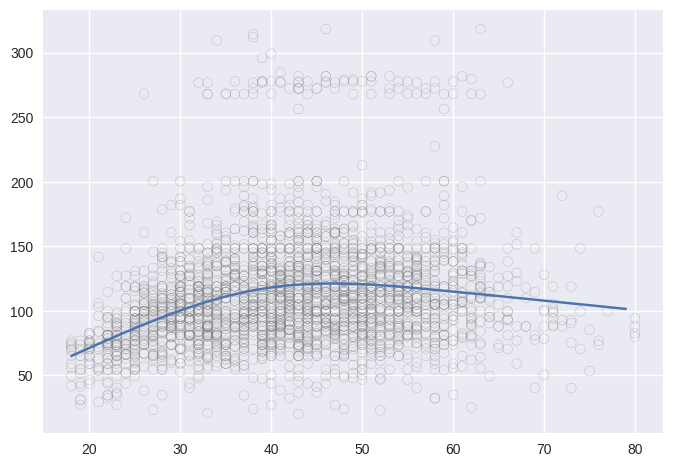

In [ ]:
age_spline3 = dmatrix('cr(age, df=4)',
                     data=wage,
                     return_type='dataframe')

age_grid_spline3 = dmatrix('cr(age_grid, df=4)',
                          {'age_grid':age_grid},
                          return_type='dataframe')

# 오류 나서 추가(Value Error)
column_rename_dict = {f"cr(age, df=4)[{i}]": f"spline_basis_{i}" for i in range(age_spline3.shape[1])}
age_spline3.rename(columns=column_rename_dict, inplace=True)

column_rename_dict = {f"cr(age_grid, df=4)[{i}]": f"spline_basis_{i}" for i in range(age_grid_spline3.shape[1])}
age_grid_spline3.rename(columns=column_rename_dict, inplace=True)

spline_reg3 = LinearRegression(fit_intercept=False)
spline_reg3.fit(age_spline3, wage.wage)

spline_pred3 = spline_reg3.predict(age_grid_spline3)

plt.scatter(wage.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolor='None')
plt.plot(age_grid, spline_pred3);

In [ ]:
year_spl = dmatrix('cr(year, df=4)',
                  data=wage,
                  return_type='dataframe').drop('Intercept', axis=1)
age_spl = dmatrix('cr(age, df=5)',
                 data=wage,
                 return_type='dataframe').drop('Intercept', axis=1)
edu_gam = pd.get_dummies(wage.education).iloc[:,1:]
wage_gam = pd.concat([wage.wage, year_spl, age_spl, edu_gam], axis=1)

X = wage_gam.iloc[:,1:14]
y = wage_gam.wage

gam = LinearRegression(fit_intercept=True)
gam.fit(X,y)

gam.intercept_, gam.coef_

(618446025658082.5,
 array([-3.33441229e+14, -3.33441229e+14, -3.33441229e+14, -3.33441229e+14,
        -2.85004797e+14, -2.85004797e+14, -2.85004797e+14, -2.85004797e+14,
        -2.85004797e+14,  1.08203125e+01,  2.32451172e+01,  3.78437500e+01,
         6.23515625e+01]))